Solved Example

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

Confusion Matrix:
[[19  0]
 [ 0 26]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



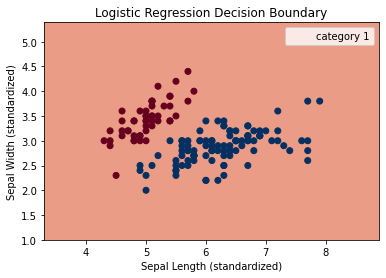

In [15]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2] # We'll use only the first two features for simplicity
y = (iris.target != 0) * 1 # Convert target labels to binary (0 or 1)
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression(solver='liblinear')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Logistic Regression Decision Boundary')
plt.legend(['category 1'])
plt.show()

In [83]:
df1 = pd.read_csv("/home/AIML_Student/Documents/B34_aiml/Lab4/gold_price.csv")
df_1 = df[df['Year']>= 1981]
d1 = df_1.to_numpy()

df2 = pd.read_csv("/home/AIML_Student/Documents/B34_aiml/Lab4/silver_price.csv")
d2 = df2.to_numpy()

In [95]:
X1 = d1[:,1]
X2 = d2[:,1]
Y = d1[:,0]

X = np.vstack((X1,X2)) #make 1D arrays a 2D
X = X.transpose() #so X and Y will have same shape
print(X.shape)
print(Y.shape)

(41, 2)
(41,)


1)
Suppose you have a gold/silver price dataset with a single independent variable (X) and a dependent variable
(Y). You want to fit a polynomial regression model to this data. Implement the process of selecting the
appropriate degree for the polynomial (e.g., linear, quadratic, cubic) based on the dataset using Python.

(41, 6)


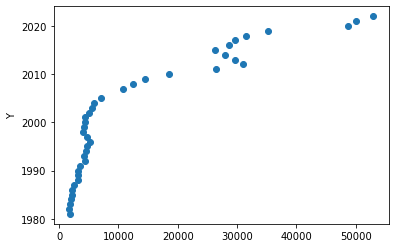

In [106]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Fit a polynomial regression model
degree = 2 # You can change the degree as needed
poly_f = PolynomialFeatures(degree=degree)

X_poly = poly_f.fit_transform(X)
print(X_poly.shape)

x_train, x_test, y_train, y_test= train_test_split(X_poly, Y, test_size= 0.25, random_state=0)  

model = LinearRegression()
model.fit(x_train, y_train)

Y1 = model.predict(x_test)

plt.scatter(X1, Y, label='Original Data')
plt.ylabel('Y')
plt.show()

2)
Suppose you have a gold/silver price dataset with a single independent variable (X) and a dependent variable (Y). You want to fit a logistic regression model to this data. Develop an example code snippet in Python.

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [87]:
#X = df1['Price (24 karat per 10 grams)']
#Y = df1['Year']

#taking previous X and Y

print(X.shape)

x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.25, random_state=0)  

(41, 2)


In [88]:
#create and fit model
model = LogisticRegression(solver='liblinear', random_state=0).fit(X,Y)

In [90]:
model.score(X, Y)

0.12195121951219512

In [ ]:
#implement logistic regression

3)
Imagine you have a gold and silver price dataset with two independent variables (X1 and X2) and a dependent variable (Y). Implement in python, how you can perform multivariate polynomial regression to model the relationship between the independent variables and the dependent variable.

In [61]:
#gold dataset: d1
#silver dataset: d2

X1 = d1[:,1]
X2 = d2[:,1]
Y = d1[:,0]

X = np.vstack((X1,X2)) #make 1D arrays a 2D
X = X.transpose() #so X and Y will have same shape
print(X.shape)
print(Y.shape)

(41, 2)
(41,)


In [62]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Fit a polynomial regression model
degree = 2 # You can change the degree as needed
poly_f = PolynomialFeatures(degree=degree)
X_poly = poly_f.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, Y)

LinearRegression()

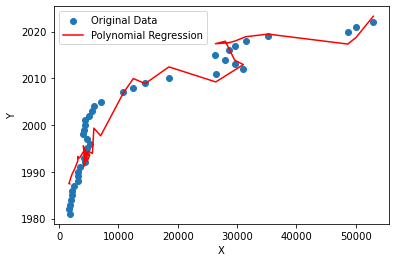

Coefficients:  [ 0.00000000e+00 -4.15741327e-04  1.78468747e-03 -7.70442910e-09
  2.70547484e-08 -3.09074612e-08]
Intercept:  1983.4424147303844


In [70]:
# Make predictions

Y_new = model.predict(X_poly)

# Plot the original data and the polynomial regression curve
plt.scatter(X1, Y, label='Original Data')
plt.plot(X1, Y_new, 'r-', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# The coefficients of the multivariate polynomial regression model
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients: ",coefficients)
print("Intercept: ",intercept)

4)
Imagine you have a gold and silver price dataset with two independent variables (X1 and X2) and a
dependent variable (Y). Implement in python, how you can perform the logistic regression to model the
relationship between the independent variables and the dependent variable

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#X = df1['Price (24 karat per 10 grams)']
#Y = df1['Year']
#taking previous X and Y

print(X.shape)

x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.25, random_state=0)  

#create and fit model
model = LogisticRegression(solver='liblinear', random_state=0).fit(X,Y)
model.score(X, Y)

(41, 2)


0.12195121951219512